# Principal Component Analysis (PCA) is Easy

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./input"))

# Any results you write to the current directory are saved as output.

['Admission_Predict_Ver1.1.csv']


# Don't know what is PCA? Check out Siraj's video on PCA [here](https://youtu.be/jPmV3j1dAv4)

## Loading libraries and input data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
# reading dataset
df=pd.read_csv('./input/Admission_Predict_Ver1.1.csv')

**Checking the data:**

In [3]:
display(df.head())
df.info()
display(df.describe())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## No Missing data, thats great!!

In [4]:
#dividing into features and labels
features=df.iloc[:,1:-1]
labels=df.iloc[:,-1]
display(features[:5])
display(labels[:5])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [5]:
new_labels=pd.cut(np.array(labels),3, labels=["bad", "medium", "good"])
print(new_labels.shape)
new_labels[:5]

(500,)


[good, medium, medium, good, medium]
Categories (3, object): [bad < medium < good]

## Standardization/Normalization of features

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Normalizing the data
standardized_data=StandardScaler().fit_transform(features)
standardized_data[:5]

array([[ 1.81923762,  1.77886545,  0.77558214,  1.13735981,  1.09894429,
         1.77680627,  0.88640526],
       [ 0.66714832, -0.03160087,  0.77558214,  0.63231549,  1.09894429,
         0.48585943,  0.88640526],
       [-0.0418297 , -0.52536441, -0.09979274, -0.37777315,  0.01730621,
        -0.95404281,  0.88640526],
       [ 0.48990382,  0.46216267, -0.09979274,  0.12727117, -1.06433187,
         0.15484742,  0.88640526],
       [-0.21907421, -0.68995225, -0.97516761, -1.3878618 , -0.52351283,
        -0.6064802 , -1.12815215]])

# PCA using only Numpy

In [8]:
print('NumPy covariance matrix: \n%s' %np.cov(standardized_data.T))
cov_mat = np.cov(standardized_data.T)

NumPy covariance matrix: 
[[1.00200401 0.82885812 0.63664951 0.61472713 0.52573085 0.82753302
  0.56452718]
 [0.82885812 1.00200401 0.6511014  0.64570179 0.54264859 0.81219793
  0.46794796]
 [0.63664951 0.6511014  1.00200401 0.72948254 0.60987045 0.70666768
  0.42790326]
 [0.61472713 0.64570179 0.72948254 1.00200401 0.66503693 0.71358149
  0.40893371]
 [0.52573085 0.54264859 0.60987045 0.66503693 1.00200401 0.6387467
  0.37327215]
 [0.82753302 0.81219793 0.70666768 0.71358149 0.6387467  1.00200401
  0.50231563]
 [0.56452718 0.46794796 0.42790326 0.40893371 0.37327215 0.50231563
  1.00200401]]


In [9]:
#Calculating the eigen values and vectors
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.40361694  0.27452263  0.36263743 -0.14482269 -0.73757122  0.25090997
   0.04779188]
 [ 0.40120339  0.11081202  0.46108277 -0.12684268  0.2632937  -0.72652707
  -0.03008301]
 [ 0.3834133  -0.2497745  -0.09291061  0.64173368 -0.02642093 -0.03207901
   0.60698049]
 [ 0.38466158 -0.3434338  -0.17312554  0.32685429 -0.12279282 -0.01981706
  -0.76276584]
 [ 0.3471675  -0.42602733 -0.46450082 -0.64859464 -0.08846344 -0.09562054
   0.21111694]
 [ 0.42103736  0.01504455  0.24073704 -0.13665843  0.59332137  0.62726591
  -0.01945709]
 [ 0.28872336  0.74182095 -0.58615408  0.07022078  0.10503789 -0.07193756
  -0.04031081]]

Eigenvalues 
[4.73582567 0.74323771 0.56275335 0.38112753 0.14824242 0.17863639
 0.264205  ]


In [10]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.735825667372012
0.7432377092295829
0.5627533509380565
0.3811275278982486
0.2642049984459163
0.178636386749477
0.14824241547893272


In [11]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(7,1), 
                      eig_pairs[1][1].reshape(7,1)))

print('Matrix W:\n', matrix_w)


Matrix W:
 [[ 0.40361694  0.27452263]
 [ 0.40120339  0.11081202]
 [ 0.3834133  -0.2497745 ]
 [ 0.38466158 -0.3434338 ]
 [ 0.3471675  -0.42602733]
 [ 0.42103736  0.01504455]
 [ 0.28872336  0.74182095]]


In [12]:
Y = standardized_data.dot(matrix_w)


In [13]:
Y.shape

(500, 2)

In [14]:
pca_data=np.vstack((Y.T,new_labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st Component","2nd Component","Chances of getting in?"))
pca_df.head()

,1st Component,2nd Component,Chances of getting in?
0,3.56837,0.328318,good
1,1.6392,-0.0345504,medium
2,-0.550991,0.720794,medium
3,0.34547,1.28024,good
4,-2.0358,-0.0393655,medium


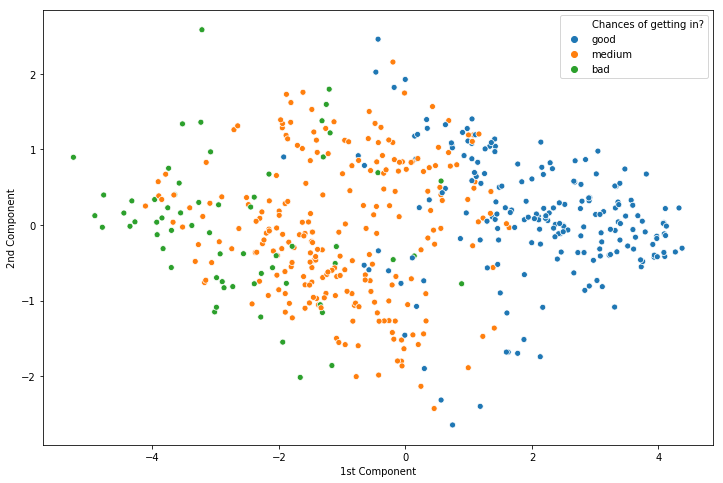

In [15]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 8)
sns.scatterplot(x="1st Component", y="2nd Component", hue="Chances of getting in?", data=pca_df);

## Using the sklearn to perform PCA. sklearn is amazing, it has it all!

In [16]:
from sklearn import decomposition
pca=decomposition.PCA()

In [17]:
pca.n_components=2
pca_data=pca.fit_transform(standardized_data)
print("The reduced shape is", pca_data.shape)

The reduced shape is (500, 2)


In [18]:
pca_data[:5]

array([[-3.56837458, -0.32831807],
       [-1.6391986 ,  0.03455037],
       [ 0.55099145, -0.72079379],
       [-0.34547019, -1.28023739],
       [ 2.03580394,  0.03936553]])

In [19]:
pca_data=np.vstack((pca_data.T,new_labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=("1st Component","2nd Component","Chances of getting in?"))
pca_df.head()

,1st Component,2nd Component,Chances of getting in?
0,-3.56837,-0.328318,good
1,-1.6392,0.0345504,medium
2,0.550991,-0.720794,medium
3,-0.34547,-1.28024,good
4,2.0358,0.0393655,medium


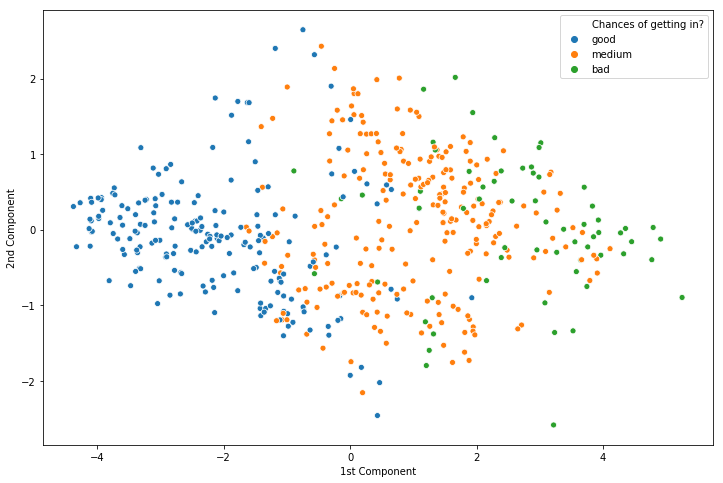

In [20]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(12, 8)
sns.scatterplot(x="1st Component", y="2nd Component", hue="Chances of getting in?", data=pca_df);

# You can see the grouping already! Yayy!